In [109]:
import pandas as pd

In [110]:
import matplotlib.pyplot as plt

In [111]:
%matplotlib inline

# Dataset 1: Stanford Open Policing Project

In [112]:
ri = pd.read_csv('RI_cleaned.csv')

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [141]:
ri.dtypes

id                     object
state                  object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted       object
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested            object
stop_duration          object
out_of_state           object
drugs_related_stop       bool
district               object
dtype: object

In [115]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

# 1. Remove the column that only contains missing values

In [116]:
ri.dropna(axis='columns', how='all', inplace=True)
ri.shape

(509681, 23)

# 2. Do man or women speed more often
### drive_gender, violation

In [117]:
ri[ri.violation=='Speeding'].driver_gender.value_counts(normalize=True)
#print("by men: {0}\nby women: {1}".format(violations_men,violations_women))

M    0.679247
F    0.320753
Name: driver_gender, dtype: float64

In [118]:
ri[ri.driver_gender=='F'].violation.value_counts(normalize=True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

In [119]:
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.657308
               Moving violation       0.136581
               Equipment              0.107055
               Registration/plates    0.043077
               Other                  0.028908
               Seat belt              0.027071
M              Speeding               0.522364
               Moving violation       0.206948
               Equipment              0.135102
               Other                  0.058450
               Registration/plates    0.040581
               Seat belt              0.036555
Name: violation, dtype: float64

In [120]:
ri.loc[:,["driver_gender", "search_conducted"]].dropna().groupby("driver_gender").search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.981249
               True                0.018751
M              False               0.956208
               True                0.043792
Name: search_conducted, dtype: float64

In [121]:
ri.search_conducted.value_counts(normalize=True)

False    0.96515
True     0.03485
Name: search_conducted, dtype: float64

In [122]:
ri.groupby(['violation', 'driver_gender']).search_conducted.value_counts(normalize=True)

violation            driver_gender  search_conducted
Equipment            F              False               0.959755
                                    True                0.040245
                     M              False               0.929084
                                    True                0.070916
Moving violation     F              False               0.961979
                                    True                0.038021
                     M              False               0.940844
                                    True                0.059156
Other                F              False               0.954102
                                    True                0.045898
                     M              False               0.953880
                                    True                0.046120
Registration/plates  F              False               0.945300
                                    True                0.054700
                     M              F

## 4. Why is search type missing so often?

In [125]:
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    491909
Name: search_type, dtype: int64

In [124]:
ri.search_type.value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

# How often is the driver frisked

In [138]:
mycopy = ri[~ri.search_type.isnull()].copy()
mycopy[mycopy.search_type.str.contains('Frisk')].count()

id                    1598
state                 1598
stop_date             1598
stop_time             1598
location_raw          1598
police_department     1598
driver_gender         1598
driver_age_raw        1598
driver_age            1595
driver_race_raw       1598
driver_race           1598
violation_raw         1598
violation             1598
search_conducted      1598
search_type_raw       1598
search_type           1598
contraband_found      1598
stop_outcome          1598
is_arrested           1598
stop_duration         1598
out_of_state          1590
drugs_related_stop    1598
district              1598
dtype: int64

## Which year had the least number of stops?

In [154]:
ri.stop_date.str.slice(0,4).value_counts()
#ri.pivot(index=year)

2012    60828
2006    58343
2007    53203
2014    50810
2008    49019
2015    47065
2011    45794
2013    44686
2009    43453
2010    42391
2005    14079
Name: stop_date, dtype: int64

In [162]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [163]:
ri.dtypes

id                            object
state                         object
stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted              object
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                   object
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [167]:
ri['stop_datetime'].dt.year.value_counts()

2012.0    60828
2006.0    58343
2007.0    53203
2014.0    50810
2008.0    49019
2015.0    47065
2011.0    45794
2013.0    44686
2009.0    43453
2010.0    42391
2005.0    14079
Name: stop_datetime, dtype: int64

## 7. How does drug activity change by time of day?
### stop_datetime, drugs_related_stop

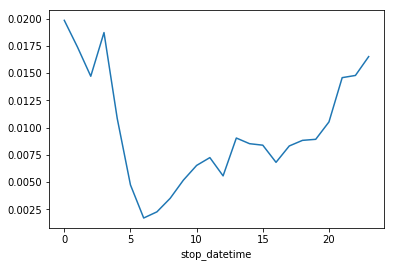

In [180]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

## 8. Do most stops occur at night?

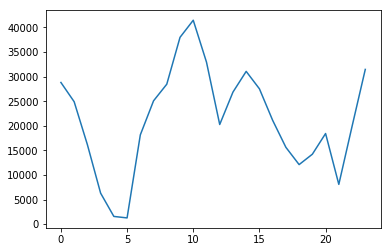

In [194]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [195]:
ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 22)]

,id,state,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1,2005-01-04 11:30:00
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
5,RI-2005-00006,RI,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00
6,RI-2005-00007,RI,2005-01-18,08:15,Zone K3,300,M,1965.0,40.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3,2005-01-18 08:15:00
7,RI-2005-00008,RI,2005-01-18,17:13,Zone X1,0,M,1967.0,38.0,H,...,NaN,NaN,False,Citation,False,16-30 Min,True,False,Zone X1,2005-01-18 17:13:00
9,RI-2005-00010,RI,2005-01-24,20:32,Zone K1,600,M,1987.0,18.0,W,...,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1,2005-01-24 20:32:00
14,RI-2005-00015,RI,2005-02-20,17:15,Zone X1,0,M,1986.0,19.0,W,...,NaN,NaN,False,Arrest Driver,True,16-30 Min,True,False,Zone X1,2005-02-20 17:15:00
16,RI-2005-00017,RI,2005-02-24,05:50,Zone X3,200,M,1965.0,40.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3,2005-02-24 05:50:00
18,RI-2005-00019,RI,2005-03-14,10:00,Zone K3,300,F,1984.0,21.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3,2005-03-14 10:00:00


# 9. Find bad data in "stop_duration" columnt and fix it.